https://github.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('/Users/danielferreira/Documents/git/classes/ASN/Séries Temporais/dados/AEP_hourly.csv')
df

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [3]:
df = df.set_index('Datetime')
df

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0


In [4]:
df.index.dtype

dtype('O')

In [5]:
df.index = pd.to_datetime(df.index)
df

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0


In [6]:
df.index.dtype

dtype('<M8[ns]')

In [7]:
serie_mensal = df.resample('MS').sum()
serie_mensal

,AEP_MW
Datetime,
2004-10-01,10349073.0
2004-11-01,10677917.0
2004-12-01,12452864.0
2005-01-01,12735114.0
2005-02-01,11085745.0
...,...
2018-04-01,9820256.0
2018-05-01,10503052.0
2018-06-01,11019780.0


<Axes: xlabel='Datetime'>

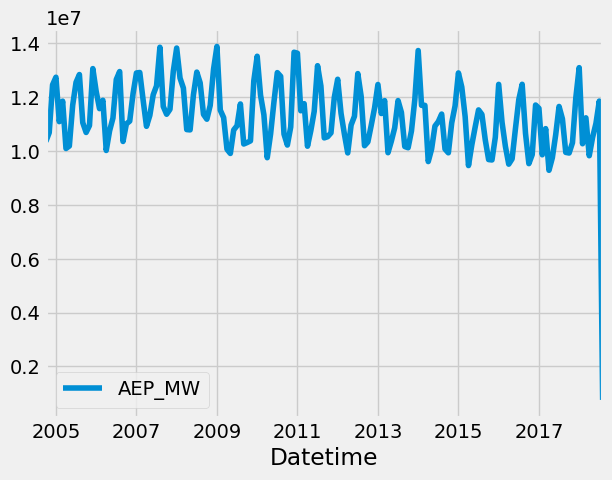

In [8]:
serie_mensal.plot()

In [9]:
all_months = pd.date_range(start=serie_mensal.index.min(), end=serie_mensal.index.max(), freq='MS')
missing_months = all_months.difference(serie_mensal.index)

# Resultado
if missing_months.empty:
    print("Nenhum mês faltando.")
else:
    print("Meses faltando:", missing_months)

Nenhum mês faltando.


In [10]:
serie_mensal = serie_mensal.drop(serie_mensal.index[-1])

<Axes: xlabel='Datetime'>

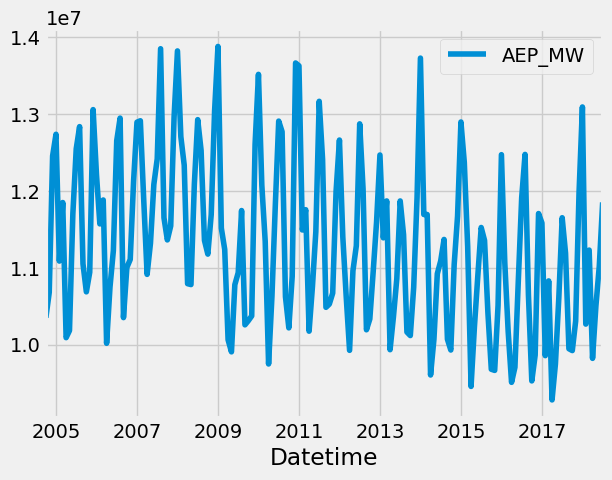

In [11]:
serie_mensal.plot()

In [14]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
import numpy as np
import matplotlib
import sklearn
import statsmodels as sm

In [15]:
print(f'''
pandas -> {pd.__version__}
numpy -> {np.__version__}
matplotlob -> {matplotlib.__version__}
statsmodels -> {sm.__version__}
scikit-learn -> {sklearn.__version__}
''')


pandas -> 2.2.3
numpy -> 2.1.3
matplotlob -> 3.9.2
statsmodels -> 0.14.4
scikit-learn -> 1.5.2



In [16]:
def read_dataset(folder, file, date_col=None):
    '''
    folder: is a Path object
    file: the CSV filename in that Path object. 
    date_col: specify a date_col to use as index_col 
    
    returns: a pandas DataFrame with a DatetimeIndex
    '''
    df = pd.read_csv(folder / file, 
                     index_col=date_col, 
                     parse_dates=[date_col])
    return df

def plot_dfs(df1, df2, col, title=None, xlabel=None, ylabel=None):
    '''	
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''    
    df_missing = df2.rename(columns={col: 'missing'})
    
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    subplots_size = len(columns)
    
    # subplots_size = df2.shape[1]
    fig, ax = plt.subplots(subplots_size+1, 1, sharex=True)
    plt.subplots_adjust(hspace=0.25)
    fig.suptitle = title 
    
    df1[col].plot(ax=ax[0], figsize=(10, 16))
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)    
    
    for i, colname in enumerate(columns):
        df_missing[colname].plot(ax=ax[i+1])
        ax[i+1].set_title(colname)

    plt.show()

def rmse_score(df1, df2, col=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data

    returns: a list of scores
    '''
    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    scores = []
    for comp_col in columns[1:]:
        rmse = np.sqrt(np.mean((df1[col] - df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
    return scores

In [24]:
folder = Path('/Users/danielferreira/Documents/git/classes/ASN/Séries Temporais/dados')

co2_original = read_dataset(folder, 'co2_original.csv', 'year')
co2_missing = read_dataset(folder, 'co2_missing_only.csv', 'year')
clicks_original = read_dataset(folder, 'clicks_original.csv', 'date')
clicks_missing = read_dataset(folder, 'clicks_missing.csv', 'date')

/var/folders/f1/tdh3lyp114g78tg5wv2t7g3m0000gn/T/ipykernel_21659/311708386.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(folder / file,
/var/folders/f1/tdh3lyp114g78tg5wv2t7g3m0000gn/T/ipykernel_21659/311708386.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(folder / file,


In [25]:
clicks_missing.loc[:, 'missing':].shape[1]

2

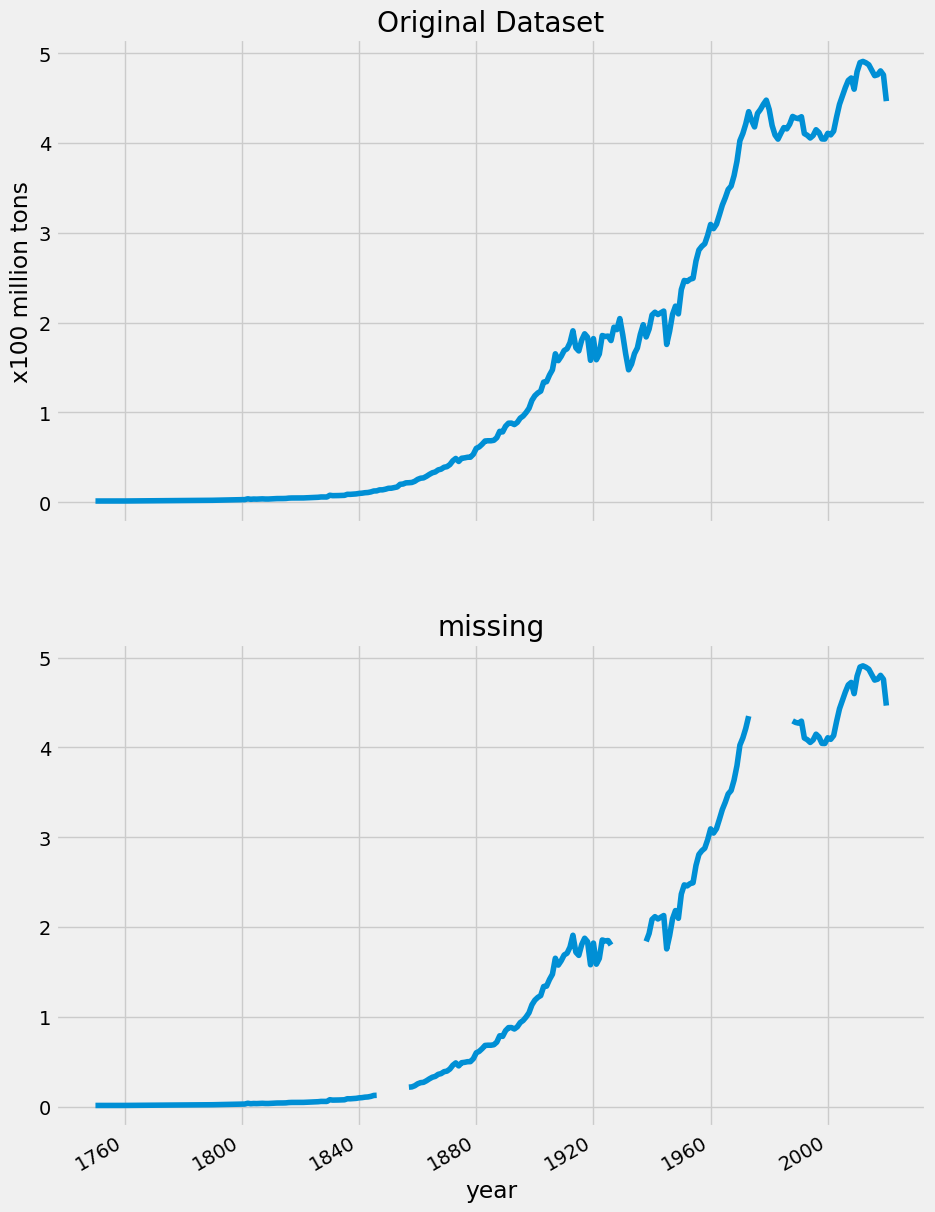

In [26]:
plot_dfs(co2_original, 
         co2_missing, 
         'co2',
         title="Annual CO2 Emission per Capita",
         xlabel="Years",
         ylabel="x100 million tons")

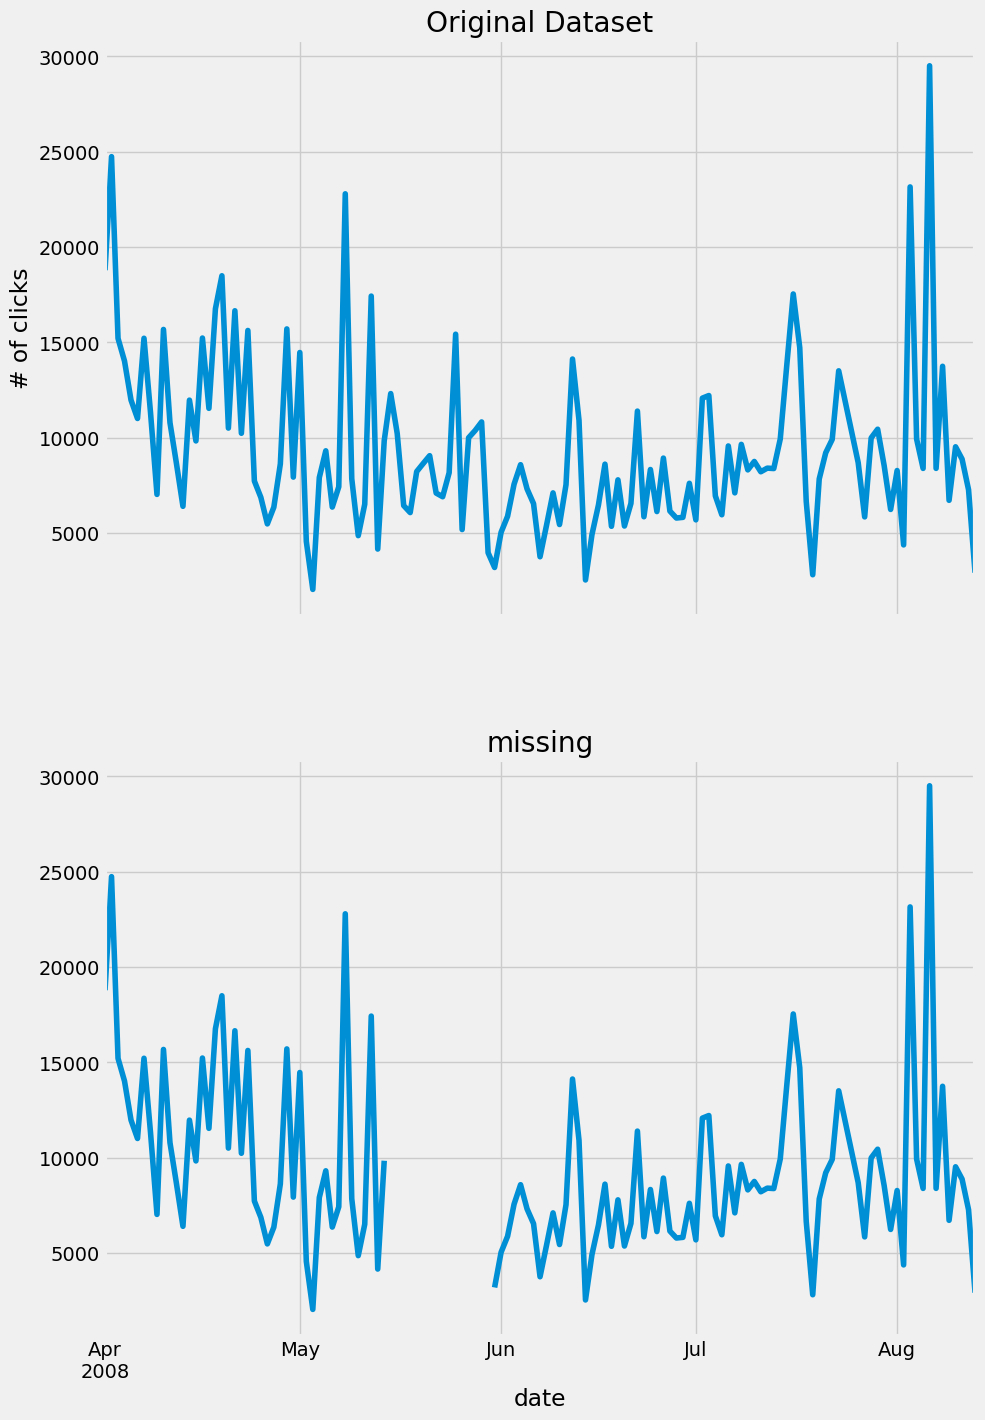

In [27]:
plot_dfs(clicks_original, 
         clicks_missing, 
         'clicks',
         title="Page Clicks per Day",
         xlabel="date",
         ylabel="# of clicks")

In [28]:
co2_missing['ffill'] = co2_missing['co2'].fillna(method='ffill')
co2_missing['bfill'] = co2_missing['co2'].fillna(method='bfill')
co2_missing['mean'] = co2_missing['co2'].fillna(co2_missing['co2'].mean())

/var/folders/f1/tdh3lyp114g78tg5wv2t7g3m0000gn/T/ipykernel_21659/3147114890.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  co2_missing['ffill'] = co2_missing['co2'].fillna(method='ffill')
/var/folders/f1/tdh3lyp114g78tg5wv2t7g3m0000gn/T/ipykernel_21659/3147114890.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  co2_missing['bfill'] = co2_missing['co2'].fillna(method='bfill')


In [30]:

_ = rmse_score(co2_original, 
                    co2_missing, 
                    'co2')

RMSE for ffill: 0.05873012599267133
RMSE for bfill: 0.05550012995280968
RMSE for mean: 0.7156383637041684


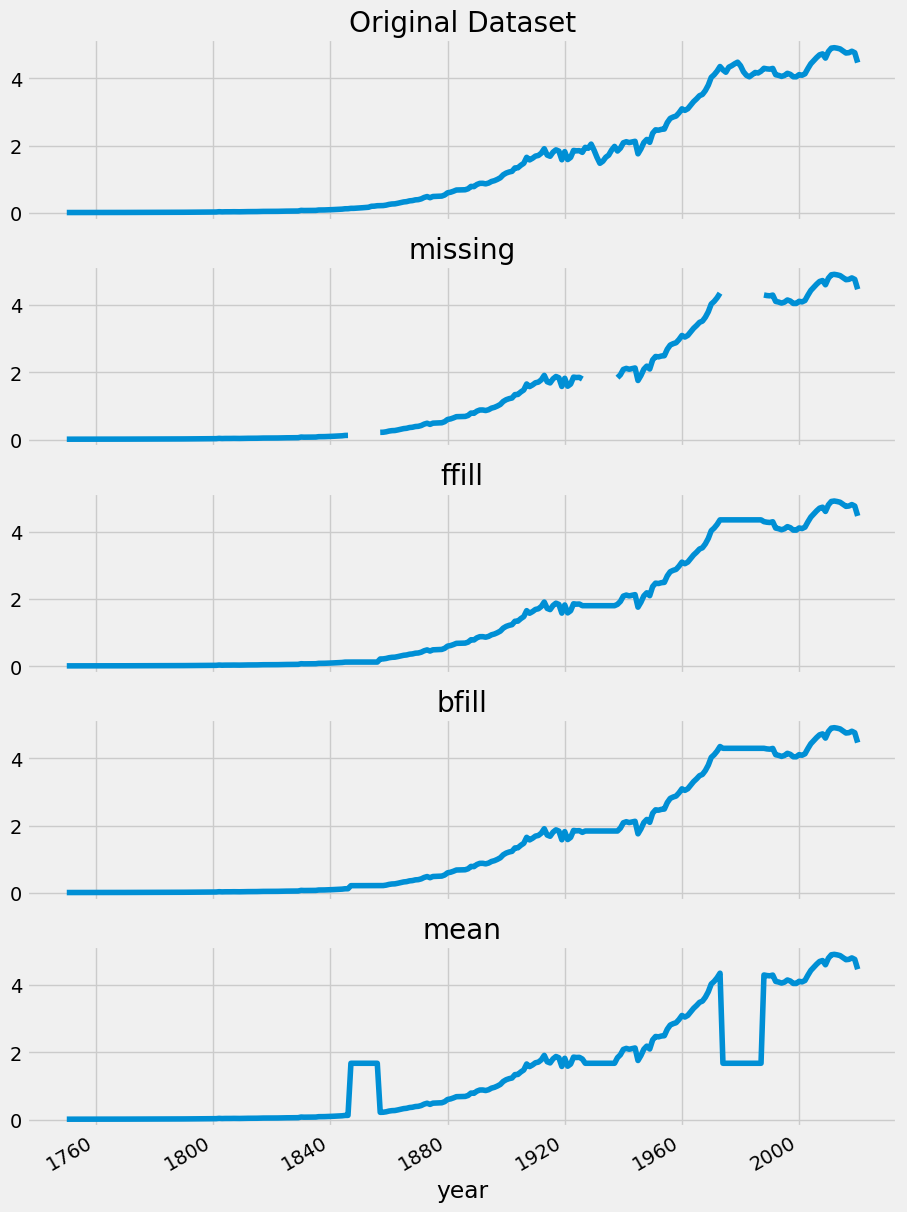

In [29]:
plot_dfs(co2_original, co2_missing, 'co2')

In [31]:
clicks_missing['ffil'] = clicks_missing['clicks'].fillna(method='ffill')
clicks_missing['bfill'] = clicks_missing['clicks'].fillna(method='bfill')
clicks_missing['mean'] = clicks_missing['clicks'].fillna(clicks_missing['clicks'].mean())

/var/folders/f1/tdh3lyp114g78tg5wv2t7g3m0000gn/T/ipykernel_21659/859338840.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  clicks_missing['ffil'] = clicks_missing['clicks'].fillna(method='ffill')
/var/folders/f1/tdh3lyp114g78tg5wv2t7g3m0000gn/T/ipykernel_21659/859338840.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  clicks_missing['bfill'] = clicks_missing['clicks'].fillna(method='bfill')


In [32]:
_ = rmse_score(clicks_original, 
                    clicks_missing, 
                    'clicks')

RMSE for ffil: 1034.1210689204554
RMSE for bfill: 2116.6840489225033
RMSE for mean: 997.7600138929953


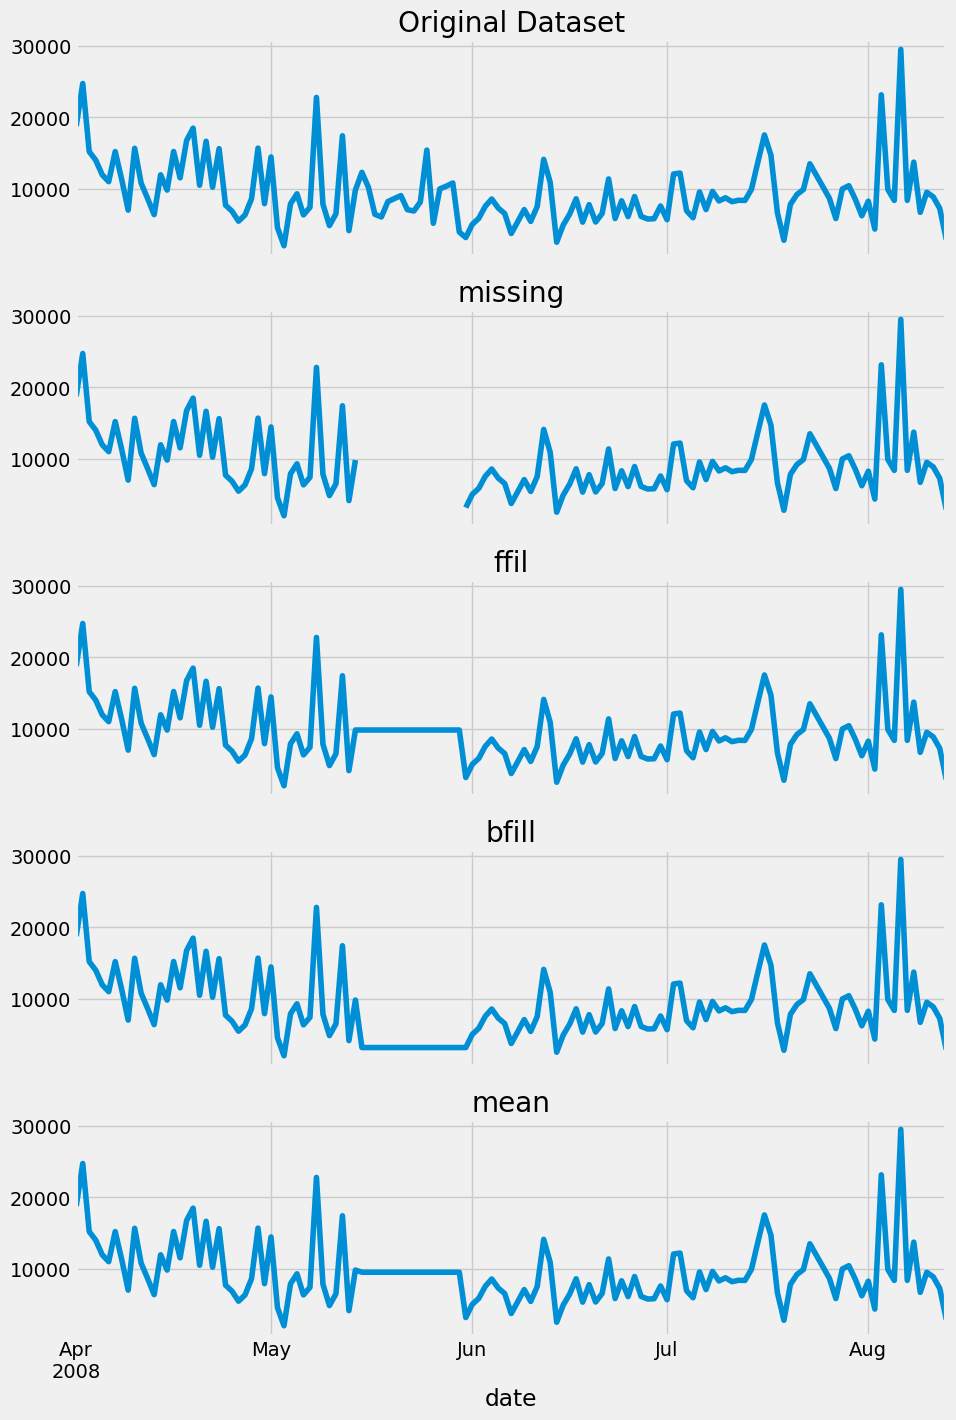

In [33]:
plot_dfs(clicks_original, clicks_missing, 'clicks')